Öğrenci Adı: Şeyda Aslı Koçyiğit
Öğrenci No : 171220028
Veri Seti: Diabetes
Görev: Hasta diyabet tahmini (0:Hayır, 1:Evet)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()  #Eksik veri kontrolü

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

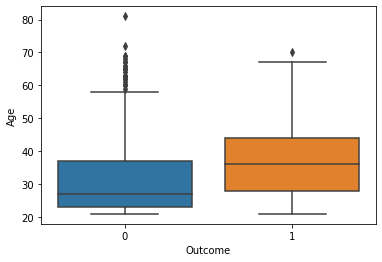

In [8]:
sns.boxplot(x='Outcome', y="Age", data=df) #Yaş - Diyabet grafiği

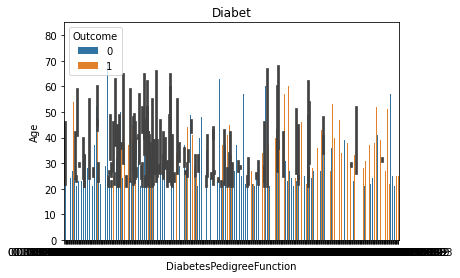

In [9]:
sns.barplot(x="DiabetesPedigreeFunction", y="Age", hue="Outcome", data=df).set_title("Diabet"); #Aileden gelen diyabet geçmişi ve yaşa göre diyabet grafiği

In [10]:
from sklearn.preprocessing import KBinsDiscretizer # Sürekli Verileri düzleştirme
Xbin = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # Yaş niteliğini 4 değerden oluşan kategorik veriye dönüştürme
df["Age"] = Xbin.fit_transform(df[["Age"]])
Xbin = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile') # Kan basıncı, glukoz ve aileden gelen diyabeti 8 değerden oluşan kategorik veriye dönüştürme
df["BloodPressure"] = Xbin.fit_transform(df[["BloodPressure"]])
df["Glucose"] = Xbin.fit_transform(df[["Glucose"]])
df["DiabetesPedigreeFunction"] = Xbin.fit_transform(df[["DiabetesPedigreeFunction"]])


In [11]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,4.0,3.0,35,0,33.6,4.0,3.0,1
1,1,0.0,2.0,29,0,26.6,2.0,2.0,0
2,8,5.0,1.0,0,0,23.3,4.0,2.0,1
3,1,0.0,2.0,23,94,28.1,0.0,0.0,0
4,0,4.0,0.0,35,168,43.1,5.0,2.0,1
5,5,2.0,3.0,0,0,25.6,1.0,2.0,0
6,3,0.0,0.0,32,88,31.0,1.0,1.0,1
7,10,2.0,0.0,0,0,35.3,0.0,2.0,0
8,2,5.0,2.0,45,543,30.5,0.0,3.0,1
9,8,3.0,5.0,0,0,0.0,1.0,3.0,1


In [12]:
from sklearn.impute import KNNImputer  # Eksik verileri komşuluğa göre tanımlama
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
imputer.fit(df)
df[:] = imputer.transform(df)

In [18]:
X = df.drop(['Outcome'], axis=1) #Nitelikler

y = df['Outcome'] # Hedef

In [19]:
#Veri setini %70 train, %30 test olarak bölmek
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [24]:
#Naive Bayes modeli
from sklearn.naive_bayes import GaussianNB

#Model örneklendi
gnb = GaussianNB()

#Train seti modele verildi
gnb.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn.metrics import accuracy_score
y_pred = gnb.predict(X_test)

print('Model doğruluğu: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model doğruluğu: 0.7835


In [27]:
y_pred_train = gnb.predict(X_train)

print('Eğitim seti doğruluğu: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Eğitim seti doğruluğu: 0.7356


In [28]:
#Eğitilmiş model kaydediliyor

import pickle
with open('Diabet_NaiveBayesModeli.pkl', 'wb') as f:
        pickle.dump(gnb, f)

In [30]:
#Karar Ağacı Modeli
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Eğitim seti doğruluğu: ", accuracy_score(y_train,y_pred))
print("Eğitim seti F1 puanı ", f1_score(y_train,y_pred))

print("Ortalama sonuç F1 puanı: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Ortalama sonuç doğruluğu: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Eğitim seti doğruluğu:  1.0
Eğitim seti F1 puanı  1.0
Ortalama sonuç F1 puanı:  0.6107221712453024
Ortalama sonuç doğruluğu:  0.6649186569747318


Eğitim seti doğruluğu çok yüksek. Overfitting problemi var. Bunu çözmeye çalışacağız.

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

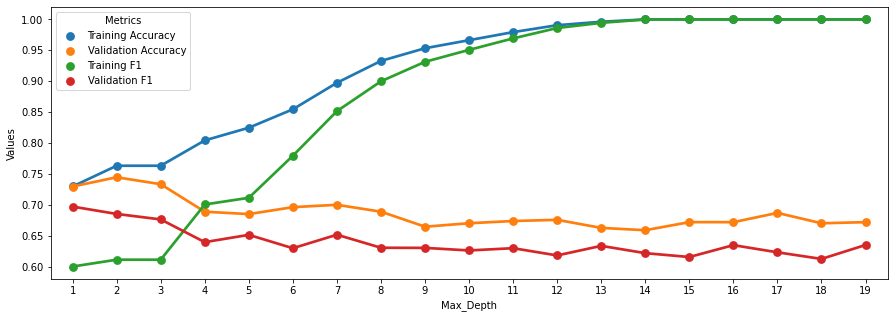

In [31]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

7 yapraklık derinlikte ideal sonuca yaklaşıyoruz.

<AxesSubplot:xlabel='Min_Samples_leaf', ylabel='Values'>

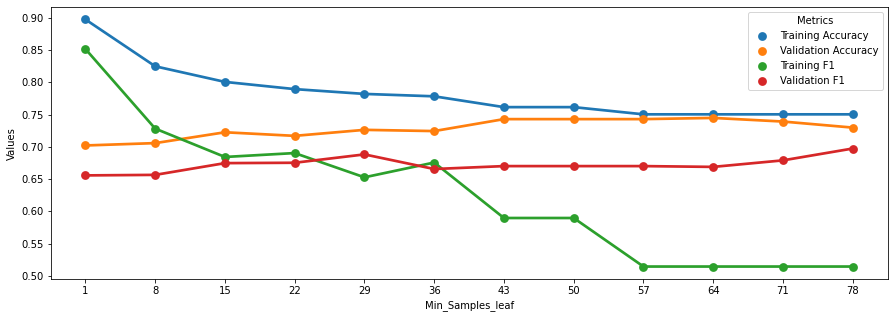

In [34]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,7): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [35]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf = 36)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7792207792207793
Confusion Matrix on Test Data


Predicted,0.0,1.0,All
True,,,
0.0,120,26,146
1.0,25,60,85
All,145,86,231


In [36]:
with open('Diabet_KararAgaciModeli.pkl', 'wb') as f:
        pickle.dump(tree_clf, f)

In [38]:
#KNN modeli
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    #Eğitim seti doğruluğu
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Test seti doğruluğu
    test_accuracy[i] = knn.score(X_test, y_test) 

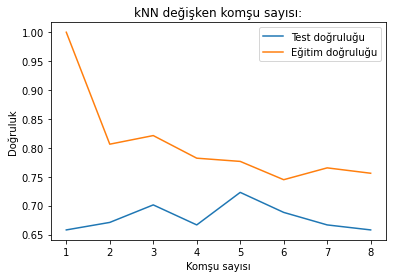

In [39]:
plt.title('kNN değişken komşu sayısı:')
plt.plot(neighbors, test_accuracy, label='Test doğruluğu')
plt.plot(neighbors, train_accuracy, label='Eğitim doğruluğu')
plt.legend()
plt.xlabel('Komşu sayısı')
plt.ylabel('Doğruluk')
plt.show()

Eğitim doğruluğunu ayarlamak için komşu sayısını 3 seçiyoruz

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
print("Train Acc: ",knn.score( X_train,y_train))
print("Test Acc: ",knn.score(X_test,y_test))

Train Acc:  0.8212290502793296
Test Acc:  0.7012987012987013


In [46]:
y_pred = knn.predict(X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[115,  31],
       [ 38,  47]], dtype=int64)

In [48]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,115,31,146
1.0,38,47,85
All,153,78,231


In [49]:
with open('Diabet_KNNModeli.pkl', 'wb') as f:
        pickle.dump(knn, f)